In [91]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [92]:
learning_rate = 0.01
training_epoch = 500
num_labels = 3
batch_size = 100
tf.reset_default_graph()

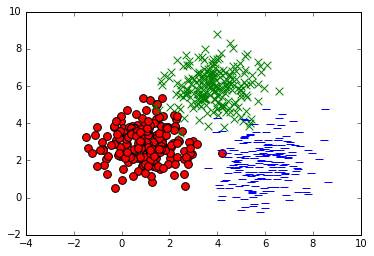

In [93]:
np.random.seed(23)
x1_label0 = np.random.normal(1, 1, (200, 1))
x2_label0 = np.random.normal(3, 1, (200, 1))
x1_label1 = np.random.normal(4, 1, (200, 1))
x2_label1 = np.random.normal(6, 1, (200, 1))
x1_label2 = np.random.normal(6, 1, (200, 1))
x2_label2 = np.random.normal(2, 1, (200, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [94]:
xs_label0 = np.concatenate((x1_label0, x2_label0), axis=1)
xs_label1 = np.concatenate((x1_label1, x2_label1), axis=1)
xs_label2 = np.concatenate((x1_label2, x2_label2), axis=1)
xs = np.concatenate((xs_label0, xs_label1, xs_label2), axis=0)
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [95]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(11, 1, (10, 1))
test_x1_label2 = np.random.normal(11, 1, (10, 1))
test_x2_label2 = np.random.normal(1, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

In [96]:
train_size, num_features = xs.shape
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)
cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_pred = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.to_float(correct_pred))

In [97]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [98]:
cur_acc = tf.summary.scalar("current_accuracy", accuracy)
merged = tf.summary.merge_all()
write = tf.summary.FileWriter("./logs", sess.graph)

In [99]:
for step in range(training_epoch * train_size // batch_size):
    offset = (step * batch_size) % train_size
    batch_xs = xs[offset:(offset + batch_size),:]
    batch_labels = labels[offset:(offset+batch_size)]
    summ, err, _ = sess.run([merged, cost, train_op], feed_dict={X:batch_xs, Y:batch_labels})
acc= sess.run(accuracy, feed_dict={X:test_xs, Y:test_labels})
print(acc)
W_val = sess.run(W)
b_val = sess.run(b)

1.0


In [101]:
x1_boundary, x2_boundary = [], []

In [111]:
for x1_test in np.linspace(0, 8, 80):
    for x2_test in np.linspace(0, 8, 80):
        z = sess.run(y_model, feed_dict={X:[[x1_test, x2_test]]})
        if abs(np.max(z) - 0.5) < 0.05:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

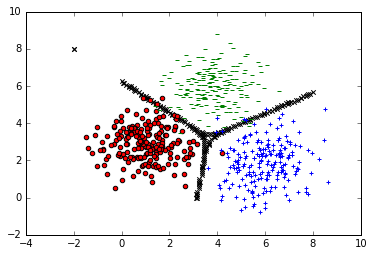

In [123]:
plt.scatter(x1_boundary, x2_boundary, c='k', marker='x', s=20)
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='g', marker='_', s=20)
plt.scatter(x1_label2, x2_label2, c='b', marker='+', s=20)
plt.show()